# Avocado Sales Analysis (2015-2021) 🥑📊

## Introduction

Avocados have become one of the most popular agricultural products in the United States, with increasing demand over the years. This project aims to analyze the sales trends of avocados from 2015 to 2021, identifying seasonal patterns, price variations, and regional consumption trends.

## Objectives of this Analysis

This project will answer key questions such as:
1. Does the price influence avocado sales?
2. Which regions consume the most avocados?
3. Are there specific months where sales peak?
4. How do seasonal patterns impact pricing strategies?

In [2]:
# Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import numpy as np
import calendar

In [3]:
# Download the last version from the dataset
path = kagglehub.dataset_download("valentinjoseph/avocado-sales-20152021-us-centric")
print("Path to dataset files:", path)

# Bouild the route using the directory home from the user
route = os.path.join(os.path.expanduser('~'),
                    ".cache", "kagglehub", "datasets",
                    "valentinjoseph", "avocado-sales-20152021-us-centric", "versions", "3")
print(os.listdir(route))  # Show the files inside the folder

Path to dataset files: /Users/alejandroviverosayala/.cache/kagglehub/datasets/valentinjoseph/avocado-sales-20152021-us-centric/versions/3
['avocado cleaned.csv']


In [4]:
# Download the route
csv_files = [file for file in os.listdir(route) if file.endswith(".csv")]
csv_file = os.path.join(route, csv_files[0])
print("CSV file to load:", csv_file)
df = pd.read_csv(csv_file)
df = df[df['region'] != 'TotalUS'] # Remove the rows where the region is 'TotalUS'
df.head()

CSV file to load: /Users/alejandroviverosayala/.cache/kagglehub/datasets/valentinjoseph/avocado-sales-20152021-us-centric/versions/3/avocado cleaned.csv


,Date,AveragePrice,TotalVolume,plu4046,plu4225,plu4770,TotalBags,SmallBags,LargeBags,XLargeBags,type,year,region
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/11/2015,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
3,1/11/2015,1.77,1182.56,39.00,305.12,0.00,838.44,838.44,0.00,0.0,organic,2015,Albany
4,1/18/2015,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany


# EDA (Exploratory Data Analysis)

Antes de comenzar a responder las preguntas planteadas, empezare realizandonoslos un analisis exploratorio de datos para familiarizarme con la base de datos y al mismo tiempo ver si es posible encontrar valores atípicos interesantes.

Comenzáre verificando los tipos de datos para así poder visualizar con un gráfico temporal de lineas el volumen mensual de ventas por mes a lo largo de los años:

In [6]:
# Check that the data type of the values in the 'Date' column
print(df['Date'].dtype)

object


In [7]:
# Change the data type to be ablt to work with it
df['Date']=pd.to_datetime(df['Date'])
print(df['Date'].dtype)

datetime64[ns]


## Monthly Sales Volume Trends

The following line graph represents the total sales volume of avocados per month over the years. It provides valuable insights into fluctuations in demand and highlights key trends in avocado consumption.

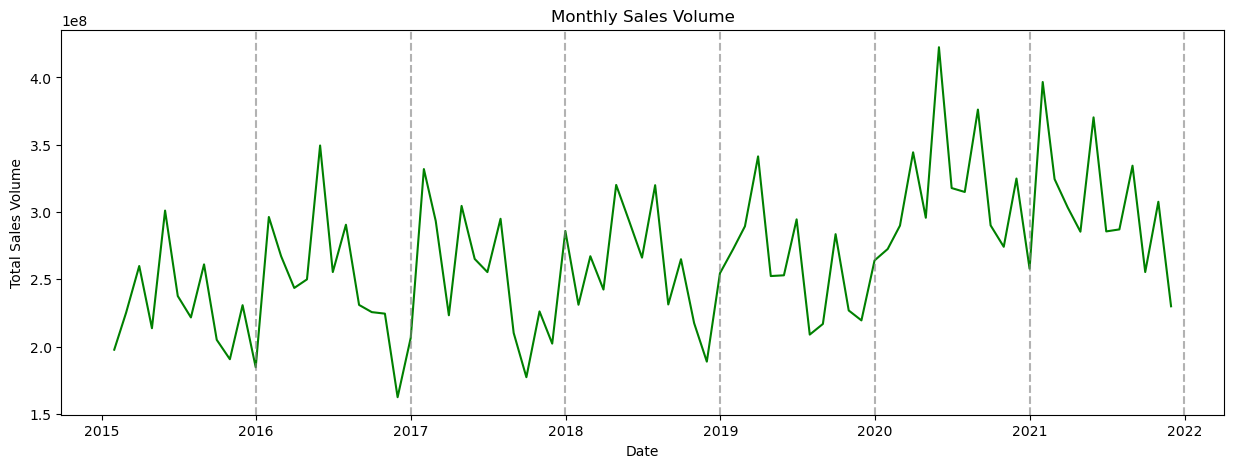

In [9]:
# Graph the sales by volume in months over the years
df_monthly = df.resample('M', on='Date').sum()

plt.figure(figsize = (15,5))
plt.plot(df_monthly.index, df_monthly['TotalVolume'], color='g')

# Add vertical lines at the end of each year
for year in range(df_monthly.index.year.min(), df_monthly.index.year.max() + 1):
    plt.axvline(pd.Timestamp(f'{year}-12-31'), color='gray', linestyle='--', alpha=0.6)

plt.xlabel("Date")
plt.ylabel("Total Sales Volume")
plt.title("Monthly Sales Volume")
plt.show()

### Observations from the Graph
- **Seasonality:** There are visible fluctuations in sales volume, with periodic peaks and drops, suggesting a seasonal pattern.
- **Growth Over Time:** Sales generally increased over the years, peaking around 2020, which could be related to shifts in consumer behavior during the COVID-19 pandemic.
- **Year-End Decline:** A noticeable drop in sales volume is observed at the end of each year, possibly due to lower consumption during winter months.
- **Sharp Spikes:** Some months exhibit sudden increases in sales, indicating potential promotional campaigns, holidays, or increased exports.

## Annual Sales Volume

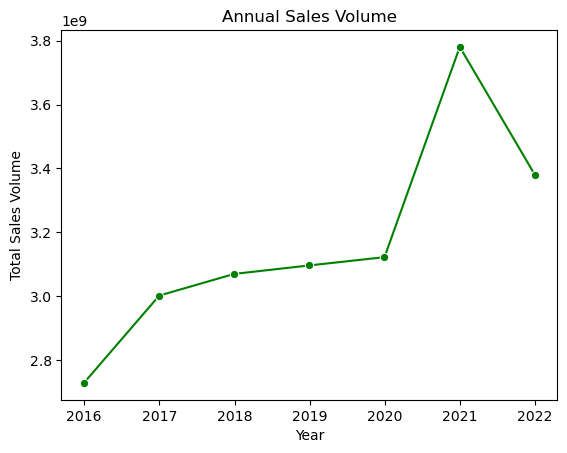

In [11]:
# Perfom the summation of each year
df_yearly = df_monthly.resample('Y').sum()
df_yearly = df_yearly.reset_index()

sns.lineplot(x='Date',y='TotalVolume',data=df_yearly,marker='o',color='g')

plt.title('Annual Sales Volume')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.show()

The graph displays the **total annual sales volume** of avocados over the years. From **2016 to 2020**, there is a steady increase in sales, indicating consistent growth in avocado consumption. However, in **2021**, there is a **sharp peak**, suggesting a significant surge in demand or supply during that year. This is followed by a noticeable **decline in 2022**, which could be due to market saturation, supply chain disruptions, or changes in consumer behavior.

Further analysis could explore the reasons behind the **2021 spike** and **2022 decline**, considering external factors such as economic conditions, agricultural production, or industry trends.

## Monthly Sales Distribution by Month

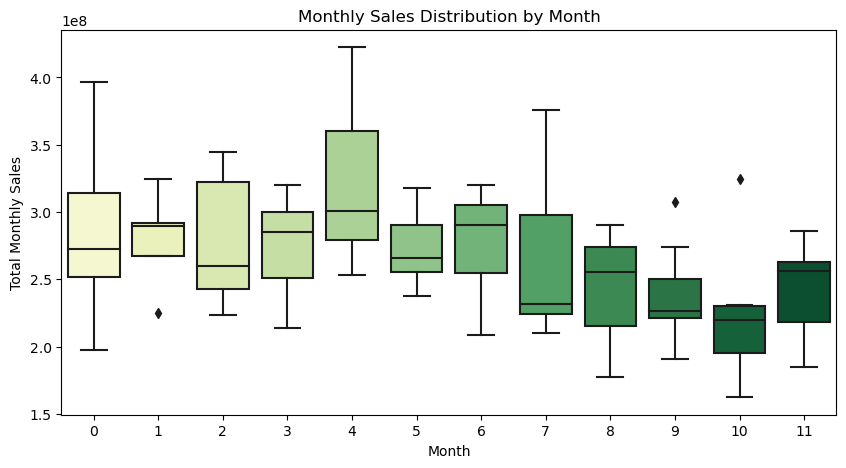

In [13]:
# Create a list of sales grouped by month
sales_per_month = [df_monthly.loc[df_monthly.index.month == month, 'TotalVolume'] for month in range(1, 13)]
plt.figure(figsize=(10,5))
sns.boxplot(data=sales_per_month,palette='YlGn')
plt.xlabel('Month')
plt.ylabel('Total Monthly Sales')
plt.title('Monthly Sales Distribution by Month')
plt.show()

The box plot illustrates the **distribution of total monthly sales** for avocados across different months. Each box represents the **interquartile range (IQR)** of sales for that month, with the median marked inside the box. The **whiskers** extend to show the range of the data, while the **dots outside the whiskers** indicate **outliers**, representing months where sales were significantly higher or lower than usual.

A few key observations:
- **April and May** have the highest median sales and the widest range, suggesting a seasonal increase in avocado demand.
- **October and November** show lower median sales and several outliers, indicating potential drops in consumption or supply fluctuations.
- **December sales tend to be more stable**, with less variation compared to other months.

This distribution suggests that **avocado sales are not uniform throughout the year** and follow a **seasonal pattern**. Understanding these trends can help businesses optimize inventory and marketing strategies.

### Price and Sales Volume Trends Over Time

#### **Graph: Price and Sales Volume Trends**

This visualization compares the trends of **Average Price** and **Total Sales Volume** over time. The **lighter green line** represents the **Average Price**, while the **darker green line** represents the **Total Sales Volume**. 

<Axes: xlabel='Date', ylabel='Valor'>

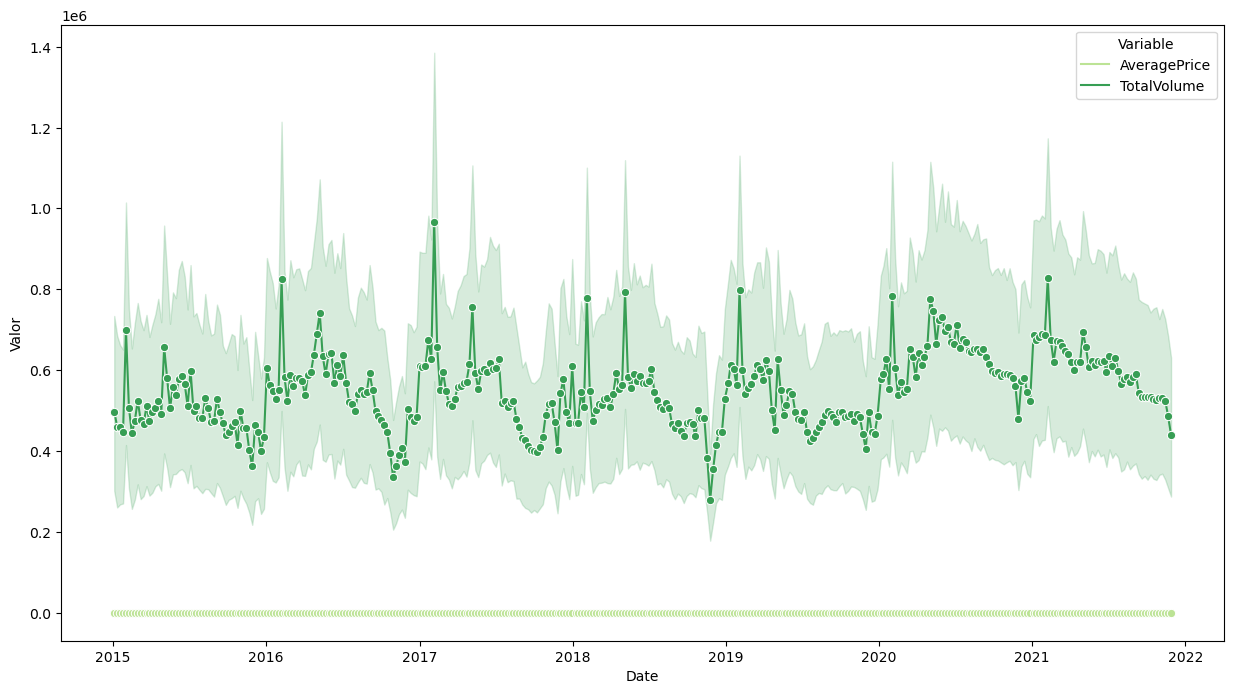

In [16]:
# The data is melted below, I need to study more on this topic

df_melted = df.melt(id_vars='Date', value_vars=['AveragePrice', 'TotalVolume'],
                    var_name='Variable', value_name='Valor')

# Plot with lineplot using 'hue' to distinguish variables
plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Valor', hue='Variable', data=df_melted, marker='o',palette='YlGn')

## Observations:
- There is visible fluctuation in both **price** and **sales volume**, indicating seasonal effects.
- **Spikes in sales volume** tend to correspond to **drops in price**, suggesting an inverse relationship.
- The shaded region around the lines represents variability, indicating periods of high volatility in both price and sales volume.
### **Graph: Smoothed Trends with a Moving Average**

To better capture the overall **trend**, a **30-day moving average** was applied to both variables. This smooths out short-term fluctuations and highlights longer-term patterns.

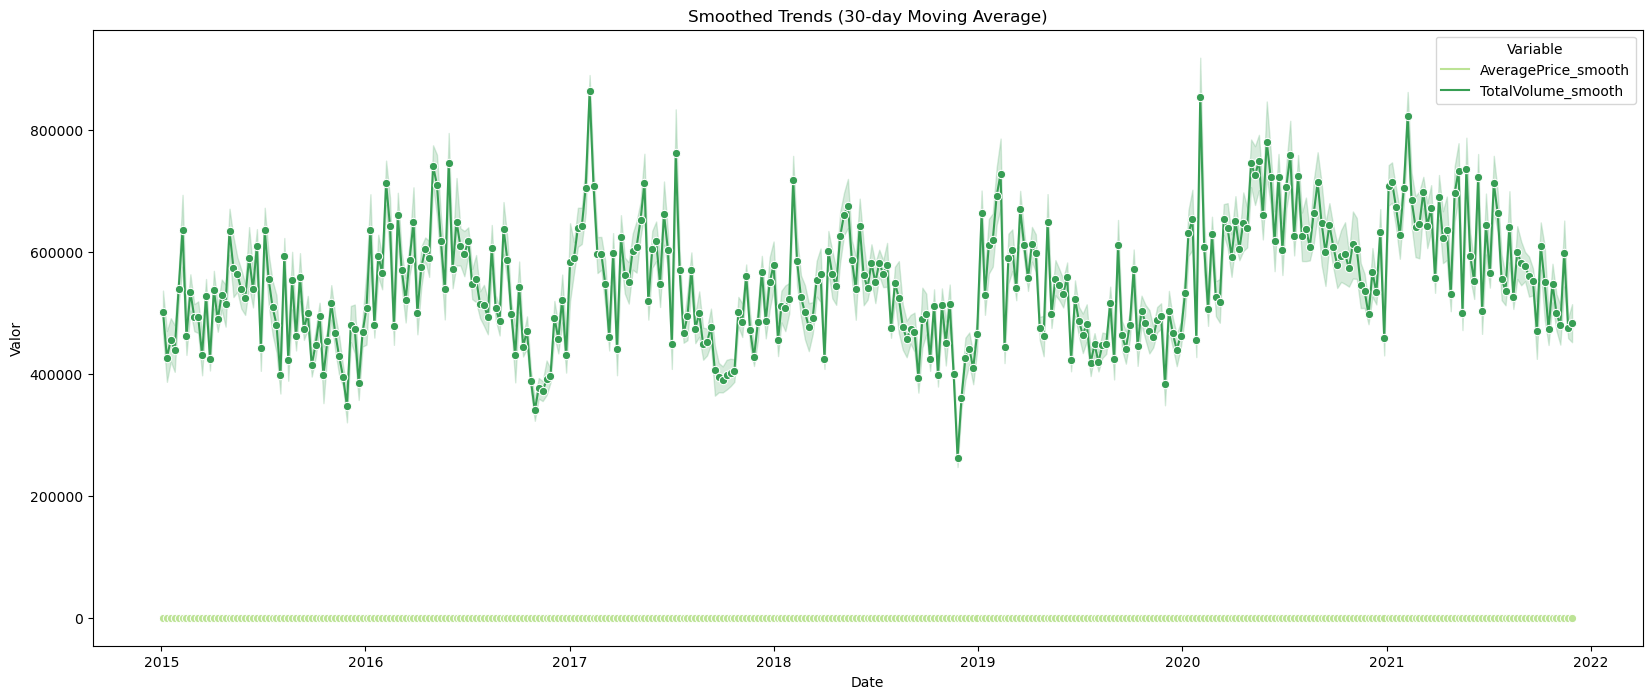

In [18]:
# Make sure 'Date' is datetime and the data is sorted
df.sort_values('Date', inplace=True)

# Calculate moving averages to smooth the data
df['AveragePrice_smooth'] = df['AveragePrice'].rolling(window=30).mean()
df['TotalVolume_smooth'] = df['TotalVolume'].rolling(window=30).mean()

# Melt the smoothed data
df_melted_smooth = df.melt(id_vars='Date', 
                           value_vars=['AveragePrice_smooth', 'TotalVolume_smooth'],
                           var_name='Variable', 
                           value_name='Valor')
# Graph
plt.figure(figsize=(20,8))
sns.lineplot(x='Date', y='Valor', hue='Variable', data=df_melted_smooth, marker='o', palette='YlGn')
plt.title("Smoothed Trends (30-day Moving Average)")
plt.show()

Key Takeaways:
- Sales volume appears to **increase over the years**, particularly after 2019.
- Despite fluctuations, **price exhibits a general declining trend**.
- **Certain periods show clear price drops when sales volume spikes**, confirming an **inverse correlation**.

These insights suggest that **avocado sales are highly seasonal**, and price changes directly impact demand. Future analysis could investigate how external factors such as weather, economic conditions, or import/export policies affect these trends.

## Monthly Evolution of Sales Volume and Average Price

This graph provides a detailed comparison between **Total Sales Volume** (green line) and **Average Price** (blue line) over time. The left y-axis represents the **total volume of sales**, while the right y-axis represents the **average price per unit**.

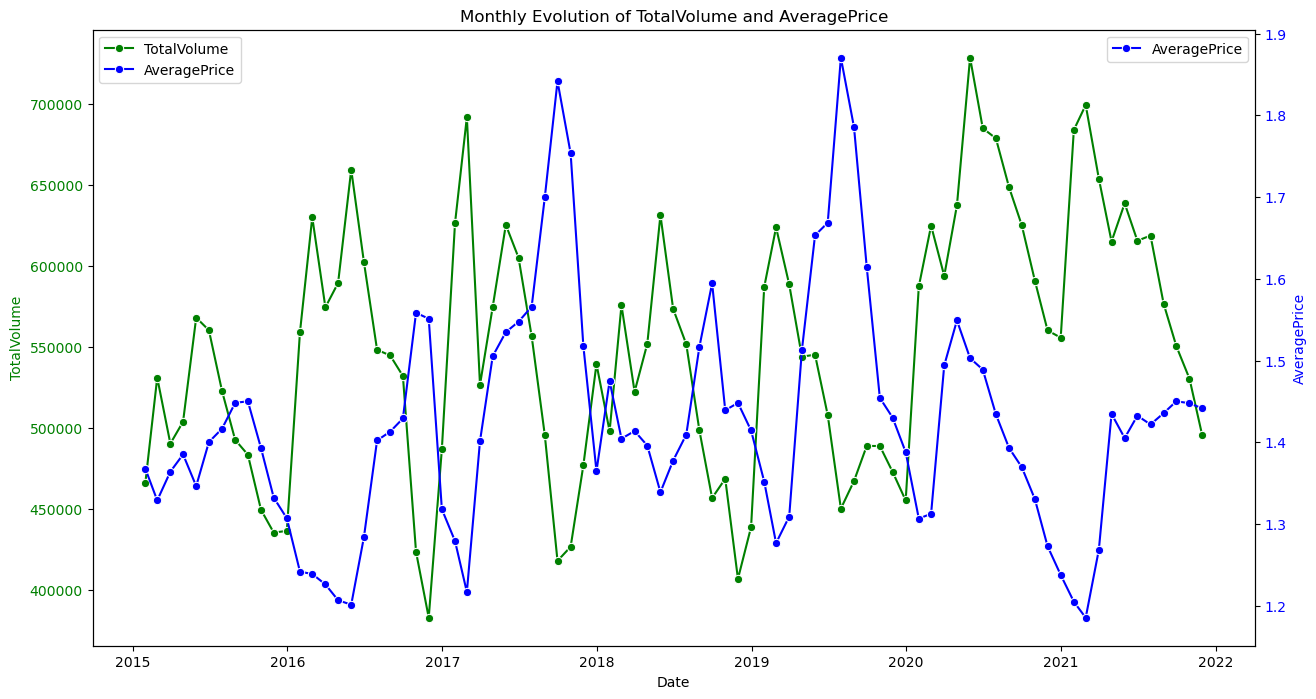

In [20]:
# Convert 'Date' column to datetime and sort the DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Resample at monthly level, but select only the numeric columns of interest
df_monthly = df.resample('M', on='Date')[['AveragePrice', 'TotalVolume']].mean().reset_index()

# Create the figure and the axes (dual-axis)
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()  # Second axis for the other variable

# Plot TotalVolume on the left axis
sns.lineplot(data=df_monthly, x='Date', y='TotalVolume', marker='o',
             color='green', ax=ax1, label='TotalVolume')
ax1.set_ylabel('TotalVolume', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Plot AveragePrice on the right axis
sns.lineplot(data=df_monthly, x='Date', y='AveragePrice', marker='o',
             color='blue', ax=ax2, label='AveragePrice')
ax2.set_ylabel('AveragePrice', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set up the X axis and title
ax1.set_xlabel('Date')
plt.title('Monthly Evolution of TotalVolume and AveragePrice')

# Combine the legends of both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

### **Key Insights:**
- There is a **strong inverse relationship** between total sales volume and average price. As **sales volume increases, price tends to drop**, and vice versa.
- Seasonal **fluctuations** are evident, with **recurring peaks and valleys** indicating consistent yearly trends.
- The period around **2020–2021 shows significant spikes in both price and volume**, suggesting possible external factors (e.g., market trends, supply chain changes, or economic conditions) influencing avocado sales.

This visualization highlights the **demand elasticity** of avocado pricing—when prices are lower, consumers buy more, and when prices rise, sales volume decreases. This insight is crucial for **market forecasting** and **strategic pricing decisions**.

## Correlation Between Average Price and Total Sales Volume

This scatter plot illustrates the relationship between **Average Price** and **Total Sales Volume** for avocados. The red regression line represents the **overall trend**, while the shaded region indicates the **confidence interval**.

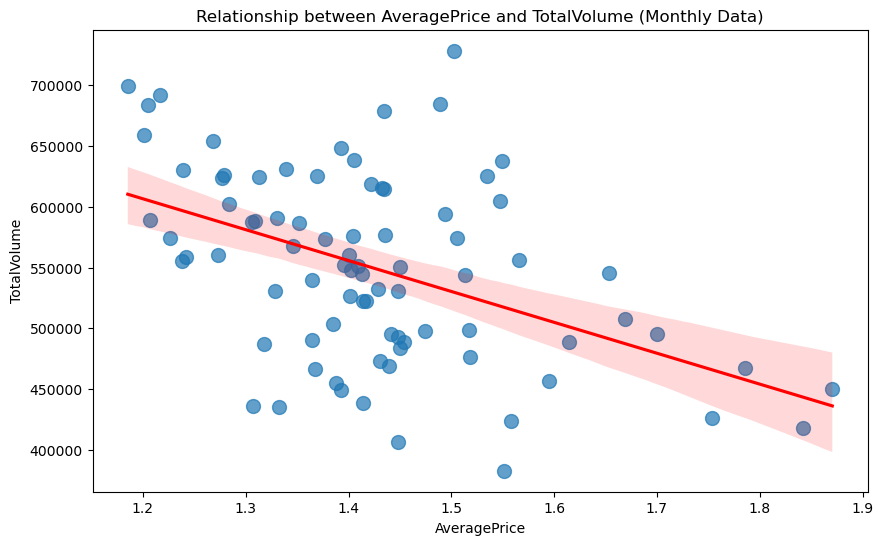

In [22]:
# Convert 'Date' to datetime and sort the DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

# Resample at monthly level, selecting only the numeric columns of interest
df_monthly = df.resample('M', on='Date')[['AveragePrice', 'TotalVolume']].mean().reset_index()

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='AveragePrice', y='TotalVolume', data=df_monthly,
            scatter_kws={'s': 100, 'alpha': 0.7}, line_kws={'color': 'red'})
plt.xlabel('AveragePrice')
plt.ylabel('TotalVolume')
plt.title('Relationship between AveragePrice and TotalVolume (Monthly Data)')
plt.show()

### **Key Observations:**
- There is a **negative correlation** between average price and total sales volume. As the **price increases, the sales volume tends to decrease**.
- The **spread of data points** suggests some variability, meaning external factors might influence both **pricing and demand**.
- The trend aligns with basic **economic principles**—as prices go up, consumers tend to buy less, and when prices decrease, demand increases.

This analysis reinforces the **price sensitivity** of avocado sales, highlighting the importance of pricing strategies for **maximizing sales while maintaining profitability**.

## Comparison of Total Volume and Average Price by Month

### **Monthly Trends in Sales Volume and Price**

This graph presents the **seasonal trends** in both **total sales volume** (green line) and **average price** (blue line) of avocados across the months.

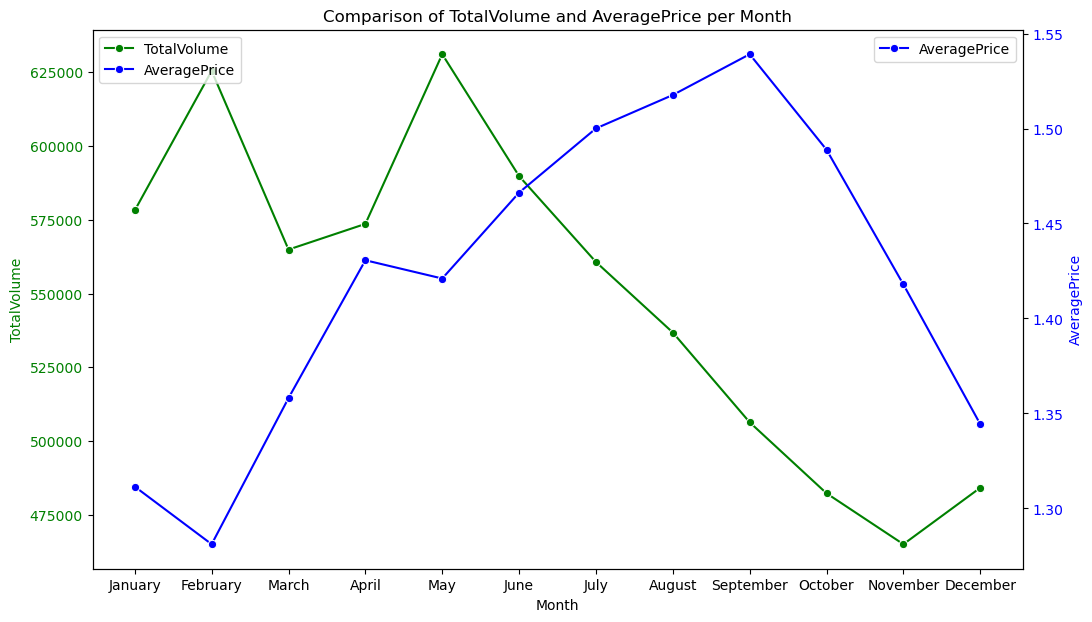

In [48]:
# Extract the month number from the Date and save it in a new column
df['Month'] = df['Date'].dt.month

# Group by month and calculate the average of AveragePrice and TotalVolume
monthly_avg = df.groupby('Month')[['AveragePrice', 'TotalVolume']].mean().reset_index()

# Convert the month number to a name (optional, for better readability)
monthly_avg['MonthName'] = monthly_avg['Month'].apply(lambda x: calendar.month_name[x])

# Sort by month (just in case)
monthly_avg.sort_values('Month', inplace=True)

# Create the graph with dual axes
fig, ax1 = plt.subplots(figsize=(12,7))
ax2 = ax1.twinx()

# Plot TotalVolume on the left axis (e.g. in green)
sns.lineplot(data=monthly_avg, x='Month', y='TotalVolume', marker='o',
             color='green', ax=ax1, label='TotalVolume')
ax1.set_ylabel('TotalVolume', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Plot AveragePrice on the right axis (e.g. in blue)
sns.lineplot(data=monthly_avg, x='Month', y='AveragePrice', marker='o',
             color='blue', ax=ax2, label='AveragePrice')
ax2.set_ylabel('AveragePrice', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Customize the X-axis to display month names instead of numbers
ax1.set_xlabel('Month')
ax1.set_xticks(monthly_avg['Month'])
ax1.set_xticklabels(monthly_avg['MonthName'])

# Combine the legends of both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Comparison of TotalVolume and AveragePrice per Month')
plt.show()

### **Key Observations:**
- There is an **inverse relationship** between sales volume and price throughout the year.
- **Sales volume peaks between March and June**, followed by a steady decline until November.
- **Prices tend to be lowest when sales volume is highest** and rise as sales decline, particularly in the second half of the year.
- The highest **average prices** are observed around **August and September**, when **total sales volume is at its lowest**.

These findings highlight the **seasonal nature of avocado sales**, where **consumer demand and supply fluctuations** drive price changes.

## Total Volume by Region and Pareto Curve (80-20 Rule)

This **Pareto chart** illustrates the distribution of **total avocado sales volume** across different **regions** in the U.S., with the **cumulative percentage curve** (red) indicating the contribution of each region.

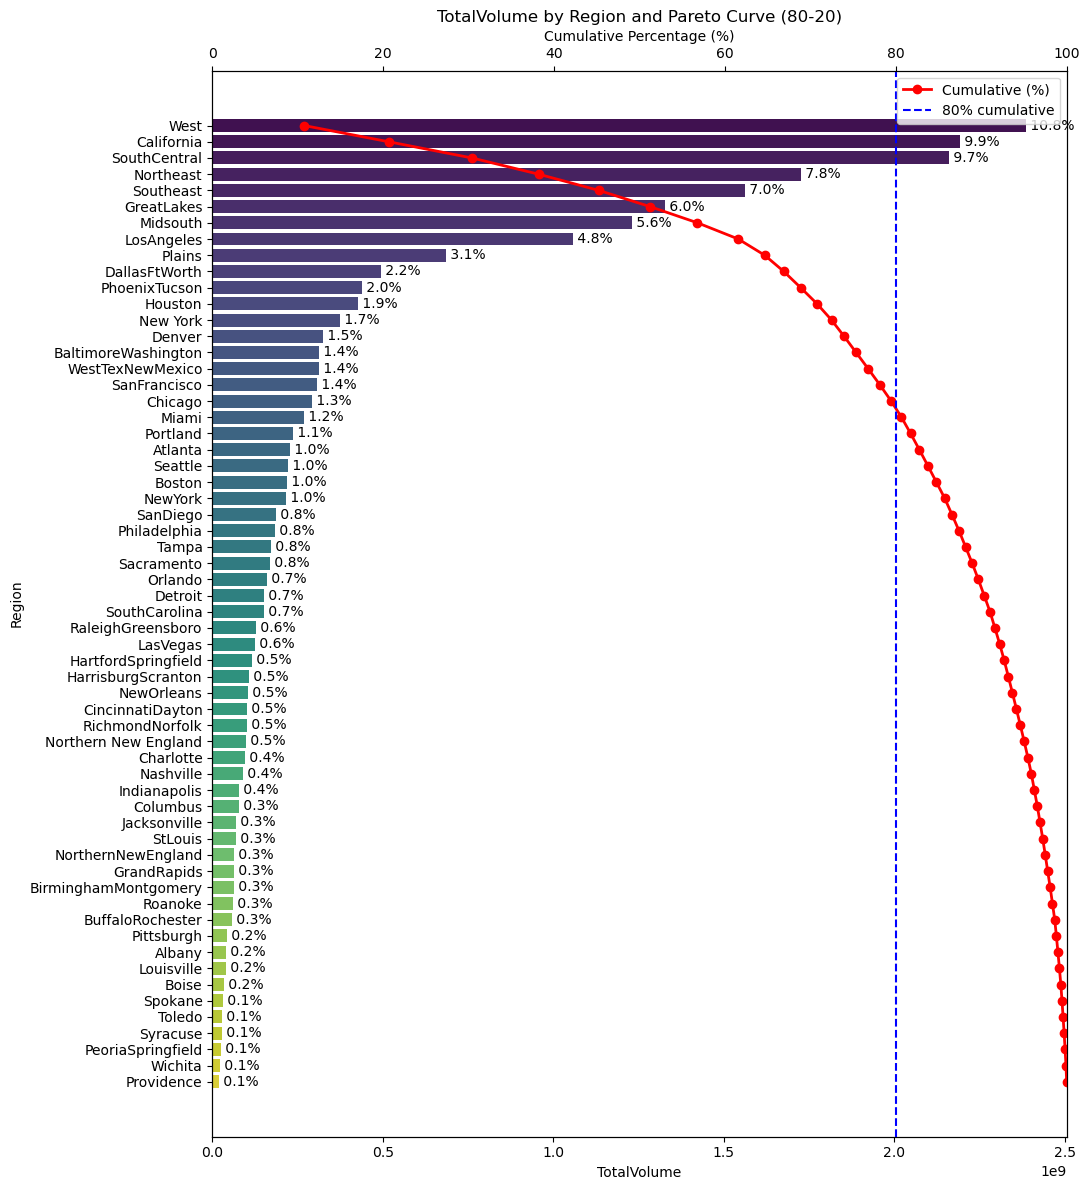

In [53]:
# 1. Group by 'region' and sum TotalVolume
df_region = df.groupby('region')['TotalVolume'].sum().reset_index()

# 2. Sort in descending order based on TotalVolume
df_region_sorted = df_region.sort_values(by='TotalVolume', ascending=False).reset_index(drop=True)

# 3. Calculate the total sum and the percentage of each region
total_volume = df_region_sorted['TotalVolume'].sum()
df_region_sorted['percentage'] = 100 * df_region_sorted['TotalVolume'] / total_volume

# 4. Compute the cumulative percentage
df_region_sorted['cumulative'] = df_region_sorted['percentage'].cumsum()

# Display the resulting DataFrame in the console
# print("TotalVolume, percentage, and cumulative percentage per region:")
# print(df_region_sorted)

# 5. Create the Pareto chart: Horizontal bar plot + cumulative percentage line
fig, ax1 = plt.subplots(figsize=(11, 12))

# Horizontal bar plot for TotalVolume per region
sns.barplot(data=df_region_sorted, y='region', x='TotalVolume', palette='viridis', ax=ax1)

# Add percentage labels on each bar
for i, (vol, perc) in enumerate(zip(df_region_sorted['TotalVolume'], df_region_sorted['percentage'])):
    ax1.text(vol, i, f' {perc:.1f}%', color='black', va='center')

ax1.set_xlabel('TotalVolume')
ax1.set_ylabel('Region')
ax1.set_title('TotalVolume by Region and Pareto Curve (80-20)')

# Create a second axis at the top for the cumulative percentage curve
# Since the plot is horizontal, we use twiny to have another x-axis
ax2 = ax1.twiny()

# The vertical position (y) of each bar corresponds to the indices 0, 1, 2, ...
# Extract these indices for the Pareto curve line.
positions = df_region_sorted.index

# Plot the cumulative percentage line
ax2.plot(df_region_sorted['cumulative'], positions, color='red', marker='o', linestyle='-', linewidth=2, label='Cumulative (%)')
ax2.set_xlabel('Cumulative Percentage (%)')
ax2.set_xlim(0, 100)

# Draw a vertical line at 80% to highlight the Pareto 80-20 rule
ax2.axvline(80, color='blue', linestyle='--', label='80% cumulative')
ax2.legend(loc='upper right')

# Adjust layout to ensure both axes are well displayed
plt.tight_layout()
plt.show()

### **Key Observations:**
- The **top 6 regions** (West, California, South Central, Northeast, Southeast, and Great Lakes) contribute to nearly **80% of the total sales volume**.
- The **West and California regions dominate**, contributing around **16% and 10%**, respectively.
- The **Pareto Principle (80-20 Rule) holds**, as a **small number of regions** account for the **majority of sales**, while the remaining regions contribute **only marginally**.

This analysis helps in **strategic decision-making** for **market targeting**, **supply chain optimization**, and **advertising efforts** focused on **high-demand regions**.

# **Final Conclusion: Avocado Sales Analysis (2015-2021)**

Through a comprehensive data analysis of avocado sales from 2015 to 2021, we have identified key trends, seasonal variations, and significant insights into pricing dynamics and regional demand. Below are the main takeaways from our study:

## **1. Sales Trends Over Time**
- The **total sales volume** has exhibited an **upward trend** from 2015, peaking in 2021 before experiencing a decline in 2022. This suggests that avocado consumption has been growing over time, potentially driven by increased popularity and consumer demand.
- The **monthly sales volume graph** highlights seasonal fluctuations, with some months consistently performing better than others.

## **2. Seasonality and Monthly Distribution**
- The **box plot analysis** indicates that sales tend to be **higher in certain months**, with peaks around April, May, and some spikes later in the year.
- The **monthly volume vs. price comparison** suggests an **inverse relationship**—sales tend to drop as prices increase, which aligns with economic expectations of supply and demand.

## **3. Correlation Between Price and Sales**
- The scatter plot analysis confirms a **negative correlation** between **average price and total sales volume**. This means that as the price increases, the volume of avocados sold decreases.
- The **time-series analysis** also demonstrates that periods of lower prices often coincide with higher sales, reinforcing this finding.

## **4. Regional Distribution and Pareto Principle**
- The Pareto chart reveals that **a few regions dominate the majority of avocado sales**, following the **80-20 rule**.
- The **top contributing regions** include **California, the West, and South Central** areas, which collectively account for a substantial portion of total sales.
- This suggests that market strategies should focus on these high-demand regions while exploring opportunities for expansion in underperforming areas.

## **Final Thoughts**
The analysis highlights **clear seasonal patterns, price sensitivity, and regional disparities** in avocado sales. These insights can be leveraged for **demand forecasting, pricing strategies, and regional marketing efforts**. Future research could explore external factors such as weather conditions, economic influences, and consumer trends to refine these findings further.

Overall, this project provides a **data-driven perspective on avocado sales**, offering valuable insights that can aid decision-making in supply chain management, retail strategies, and agricultural planning.